<a href="https://colab.research.google.com/github/ferdyfebriyanto/MachineLearning/blob/main/5_KELOMPOK_B_NIM_NAMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##Binary Classification – Spam Filtering Hal 8

import pandas as pd
import io

from google.colab import files
uploaded = files.upload()


Saving sms1.csv to sms1.csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv('sms1.csv', delimiter = '\t', header = None)
#df = df.read_csv(io.BytesIO(uploaded['SMSSpamCollection']), delimiter = '\t', header = None)
print("Out [501-Spam Filtering]:\n")
print(df.head())




Out [501-Spam Filtering]:

                                                   0
0                                      label,message
1  0,"Fighting with the world is easy, u either w...
2                           0,"When can ü come out?"
3                        0,"Check with nuerologist."
4       0,"Lolnice. I went from a fish to ..water.?"


In [ ]:
#In [3-LogRes Spam Filtering]:

import numpy as np 
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split

df = pd.read_csv('sms1.csv', delimiter = '\t', header = None)

X = df[0].values
y = df[0].values

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X,y)
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)

print('Out [3-LogRes Spam Filtering]:\n')
for i, prediction in enumerate(predictions[:500]):
  print('%i\tPredicted: %s, message: %s' % (i+1, prediction, X_test_raw[i]) )

Out [3-LogRes Spam Filtering]:

1	Predicted: 0,"Your opinion about me? 1. Over 2. Jada 3. Kusruthi 4. Lovable 5. Silent 6. Spl character 7. Not matured 8. Stylish 9. Simple Pls reply..", message: 0,"Have a good evening! Ttyl"
2	Predicted: 0,"Your opinion about me? 1. Over 2. Jada 3. Kusruthi 4. Lovable 5. Silent 6. Spl character 7. Not matured 8. Stylish 9. Simple Pls reply..", message: 0,"see, i knew giving you a break a few times woul lead to you always wanting to miss curfew. I was gonna gibe you 'til one, but a MIDNIGHT movie is not gonna get out til after 2. You need to come home. You need to getsleep and, if anything, you need to b studdying ear training."
3	Predicted: 1,"Today's Offer! Claim ur £150 worth of discount vouchers! Text YES to 85023 now! SavaMob, member offers mobile! T Cs 08717898035. £3.00 Sub. 16 . Unsub reply X", message: 1,"You have won ?1,000 cash or a ?2,000 prize! To claim, call09050000327"
4	Predicted: 1,"Today's Offer! Claim ur £150 worth of discount vouche

In [ ]:
##Performance Metrics Hal 11
from sklearn.linear_model import LinearRegression
model = LinearRegression()
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[6], [8], [10], [14], [18]]).reshape(-1,1)
y = [7,9,13,17.5,18]
model.fit(X, y)

#Prediction
test_pizza = np.array([[12]])
predicted_price = model.predict(test_pizza)[0]
print('A 12" pizza should cost: $%.2f'% predicted_price)

A 12" pizza should cost: $13.68


Out [4-Confusion Matrix Spam Filtering]:

[[4 1]
 [2 3]] 



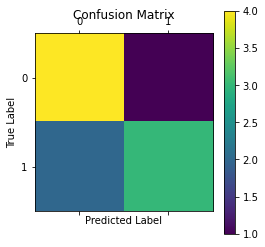

In [ ]:
# In [4-Confusion Matrix SpamFiltering]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 0, 0, 0, 0, 1, 1, 1]

confusion_matrix = confusion_matrix(y_test, y_pred)

print('Out [4-Confusion Matrix Spam Filtering]:\n')
print (confusion_matrix, '\n')
plt.matshow(confusion_matrix)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [ ]:
# In [5-Accuracy Spam Filtering]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import roc_curve, auc

df = pd.read_csv('sms1.csv', delimiter = '\t', header = None)

#X_trainn_raw, X_test_raw, y_train, y_test = train_test_split(df['message'], df['label'])
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df[0], df[0])

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

#scores = cross_val_score(classifier, X_train, y_train, cv = 5)
scores = cross_val_score(classifier, X_train, y_train, cv=5)

print('# Out [5-Accuracy Spam Filtering]:\n')
print('Accuracies: %s' % scores)
print('Mean Accuracy: %s' % np.mean(scores))






ValueError: ignored

In [ ]:
#In [6-Precision, Recall, F1 Score Spam Filtering]:

import numpy as np
import pandas as pd

df2 = pd.read_csv('sms1.csv', delimiter = '\t', header = None)
print(df2.head())

X_train_raw, X_test_raw, y_train, y_test = train_test_split(df2[0], df2[0])

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

precisions = cross_val_score(classifier, X_train, y_train, cv = 5, scoring = 'precision')
recalls = cross_val_score(classifier, X_train, y_train, cv = 5, scoring = 'recall')
f1_score = cross_val_score(classifier, X_train, y_train, cv = 5, scoring = 'f1')

print('\n\n# Out [6-Precision, Recall, F1 Score Spam Filtering]:\n')
print('Precision: %s' % np.mean(precisions))
print('Recall: %s' % np.mean(recalls))
print('F1 Score: %s' % np.mean(f1_score))
print('F1 Score: %s' % f1_score)

                                                   0
0                                      label,message
1  0,"Fighting with the world is easy, u either w...
2                           0,"When can ü come out?"
3                        0,"Check with nuerologist."
4       0,"Lolnice. I went from a fish to ..water.?"


ValueError: ignored

In [ ]:
#In [7-AUC Curve Spam Filtering]:

from sklearn import preprocessing

predictions = classifier.predict_proba(X_test)

print('Ham Proba    Spam Proba')
print(predictions[:10])
print(X_test_raw[:10])
print(y_test[:10]) #1 = spam, 0 = ham

false_positive_rate, recall, thresholds = roc_curve(y_test,predictions[:, 2])
roc_auc = auc(false_positive_rate, recall)

print('\n# Out [7-AUC Curve Spam Filtering]:\n')
plt.title("Receiver Operating Characteristics")
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0],[1.0])
plt.ylim([0.0],[1.0])
plt.xlabel("Fall Out")
plt.ylabel("Sensitivity --OR-- Recall")
plt.show()

Ham Proba    Spam Proba
[[0.0026577  0.00264238 0.00263919 ... 0.00262677 0.00277542 0.00266946]
 [0.00263777 0.00261407 0.00261061 ... 0.00265527 0.0026602  0.00264082]
 [0.00258268 0.00261307 0.00260935 ... 0.00267622 0.00259265 0.00263958]
 ...
 [0.00263137 0.00290361 0.00262307 ... 0.00273334 0.00264911 0.00265312]
 [0.00263119 0.00266219 0.00265866 ... 0.0026464  0.00264149 0.00268947]
 [0.00262795 0.00265869 0.00265516 ... 0.00264335 0.00263813 0.00268568]]
315    1,"U were outbid by simonwatson5120 on the Shi...
386    0,"I like to talk pa but am not able to. I don...
94                          0,"You still at grand prix?"
499                          0,"No..but heard abt tat.."
443    0,"I sent my scores to sophas and i had to do ...
252    1,"You have an important customer service anno...
397    0,"Thursday night? Yeah, sure thing, we'll wor...
352    0,"I am real, baby! I want to bring out your i...
151    0,"Thats cool! Sometimes slow and gentle. Sone...
62                 

ValueError: ignored

In [ ]:
parameters = {
    'vectorizer__max_df': (0.25, 0.5, 0.75),
    'vectorizer__stop_words': ('english', None),
    'vectorizer__max_features': (2500, 5000, 10000, None),
    'vectorizer__ngram_range': ((1,1), (1,2)),
    'vectorizer__use_idf': (True, False),
    'vectorizer__norm': ('11', '12'),
    'classifier__penalty': ('11', '12'),
    'classifier__C': (0.01, 0.1, 1, 10),
}

df = pd.read_csv('sms1.csv', delimiter = '\t', header = None)
X = df[0].values
y = df[0].values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y)

grid_search = GridSeacrhCV(pipeline, parameters, n_jobs = -1, verbose = 1, scoring = 'accuracy', cv = 3)
grid_search.fit(X_train, y_train)

print('\n# [*-Grid Search Spam Filtering]:\n ')
print ('Best Score: %0.3f' % grid_search.best_score_)
print('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
  #for param_name in sorted(best_parameters.key()):
  print('\t%s: %r', (param_name, best_parameters[param_name]))

predictions = grid_search.predict(X_test)  
print('Accuracy: ', accuracy_score(y_tes, predictions))
print('Precision: ', precision_score(y_tes, predictions))
print('Recall: ', recall_score(y_tes, predictions))

NameError: ignored